## 코로나-19, 실제로 약국에 도움이 되었을까?

### 이번 2023 소프트웨어 경진대회로 주어진 데이터중, 우리 팀(의 나)는 "3. 전국 약국 현황"과 "코로나-19 확진자 통계"(https://ncov.kdca.go.kr/bdBoardListR.do?brdId=1&brdGubun=11) 데이터들을 이용하여, 코로나-19가 약국에 실제로 영향을 미쳤는지, 미쳤다면 어느 방향으로 얼마나 미쳤을 지 알아보기로 하였다. 들어가기에 앞서, 먼저 데이터 전처리가 필요하다.

In [1]:
#라이브러리 불러오기
%pip install pandas
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
plt.rc("font", family = "malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#파일 불러오기
f=open("src/yakkok.csv", encoding="cp949")
data_old=csv.reader(f)
header_old=next(data_old) #데이터의 정보가 담김
data_old=list(data_old) #실제 데이터가 담김
print(header_old)
for row in data_old[:5]:
    print(row)

['암호화요양기호', '요양기관명', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드', '시군구코드명', '읍면동', '우편번호', '주소', '전화번호', '개설일자', '좌표(x)', '좌표(y)']
['JDQ4MTg4MSM1MSMkMSMkNCMkMDMkNDgxMzUxIzExIyQxIyQ3IyQ4OSQzNjE4MzIjNDEjJDEjJDQjJDgz', '스카이약국', '81', '약국', '110000', '서울', '110021', '서초구', '', '6562', '서울특별시 서초구 방배로 199, 1층 C호 (방배동)', '02-532-7225', '20230424', '126.9911577', '37.4911126']
['JDQ4MTg4MSM1MSMkMSMkNCMkMDMkNDgxNzAyIzUxIyQxIyQ1IyQ4MiQyNjEwMDIjNjEjJDEjJDAjJDgz', '화인약국', '81', '약국', '110000', '서울', '110018', '송파구', '', '5833', '서울특별시 송파구 중대로 80, (문정동, 롯데마트 3층)', '02-449-0895', '20060102', '127.1178428', '37.491762']
['JDQ4MTg4MSM1MSMkMSMkNCMkMDMkNDgxNzAyIzUxIyQxIyQ1IyQ4MiQyNjEyMjIjNTEjJDEjJDIjJDgz', '마프자서울약국', '81', '약국', '110000', '서울', '110009', '마포구', '', '4124', '서울특별시 마포구 대흥로24길 24, 상가A동 206호 (염리동)', '02-711-3119', '20210409', '126.9476615', '37.553974']
['JDQ4MTYyMiM1MSMkMSMkMCMkMDMkMzgxOTYxIzUxIyQxIyQ1IyQ3OSQyNjE4MzIjNjEjJDEjJDgjJDgz', '박하향약국', '81', '약국', '220000', '인천', '220005', '인천서구', '

#### 보다시피, 실제로 쓰기엔 부적절하거나 안 사용할 데이터가 있는 것을 확인할 수 있다. 우리가 편지를 보낼 것도 아니고, 우편번호같은 데이터는 필요 없을 것이기에 적절히 편집하였다. 또한, 확진자 통계에 관련된 데이터도 불러와주자.

In [3]:
#새 파일(그리고 코로나) 불러오기
f=open("src/new_yakkok.csv", encoding="cp949")
data=csv.reader(f)
header=next(data) #데이터의 정보가 담김
data=list(data) #실제 데이터가 담김
print(header)
for row in data[:5]: #실제 데이터의 5행만큼만, 한 줄씩 출력
    print(row)
    
f=open("src/corona.csv", encoding="cp949")
datac=csv.reader(f)
headerc=next(datac) #데이터의 정보가 담김
datac=list(datac) #실제 데이터가 담김
print(headerc)
for row in datac[:10]: #실제 데이터의 10행만큼만, 한 줄씩 출력
    print(row)

['요양기관명', '시도코드명', '시군구코드명', '주소', '전화번호', '개설일자', '좌표(x)', '좌표(y)']
['스카이약국', '서울', '서초구', '서울특별시 서초구 방배로 199, 1층 C호 (방배동)', '02-532-7225', '20230424', '126.9911577', '37.4911126']
['화인약국', '서울', '송파구', '서울특별시 송파구 중대로 80, (문정동, 롯데마트 3층)', '02-449-0895', '20060102', '127.1178428', '37.491762']
['마프자서울약국', '서울', '마포구', '서울특별시 마포구 대흥로24길 24, 상가A동 206호 (염리동)', '02-711-3119', '20210409', '126.9476615', '37.553974']
['박하향약국', '인천', '인천서구', '인천광역시 서구 이음대로 392, 메트로시티 106,107호 (원당동)', '032-568-8591', '20230418', '126.7127253', '37.5926069']
['좋은우리약국', '경기', '김포시', '경기도 김포시 감암로 7, (걸포동)', '031-987-7718', '20230412', '126.7111628', '37.6319034']
['일자', '계(명)', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '검역']
['누적(명)', '34,571,873 ', '6,751,223 ', '2,092,592 ', '1,516,396 ', '1,991,875 ', '1,018,481 ', '1,013,271 ', '738,120 ', '273,413 ', '9,266,555 ', '1,005,827 ', '1,075,459 ', '1,390,748 ', '1,167,903 ', '1,142,438 ', '1,581,188 ', '2

#### 결측치가 얼마나 있는지도 확인해봐야 할 거 같다.

In [4]:
d=pd.read_csv("src/new_yakkok.csv", encoding="cp949") # pandas 모듈을 이용해 정보를 확인해보자.
d.info()
print()
d2=pd.read_csv("src/corona.csv", encoding="cp949") # 코로나 관련 데이터도
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24654 entries, 0 to 24653
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요양기관명   24654 non-null  object 
 1   시도코드명   24654 non-null  object 
 2   시군구코드명  24654 non-null  object 
 3   주소      24654 non-null  object 
 4   전화번호    24025 non-null  object 
 5   개설일자    24643 non-null  float64
 6   좌표(x)   24169 non-null  float64
 7   좌표(y)   24169 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.5+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      1321 non-null   object
 1   계(명)    1321 non-null   object
 2   서울      1321 non-null   object
 3   부산      1321 non-null   object
 4   대구      1321 non-null   object
 5   인천      1321 non-null   object
 6   광주      1321 non-null   object
 7   대전      1321 non-null   object
 8

#### 코로나 관련 데이터는 적어도 비어있는 데이터는 없지만, 약국 데이터, 특히 개설일자가 빈 행이 있다. 주의하면서 진행하도록 하자.

### 먼저, 지역별로 살펴보기 이전에, 간단하게 전국적으로 알아보자.

#### 차근차근 접근해보자:

##### 현재 등록된 약국들은, 언제 가장 많이 개설되었을까? (1990년대 이후)

921


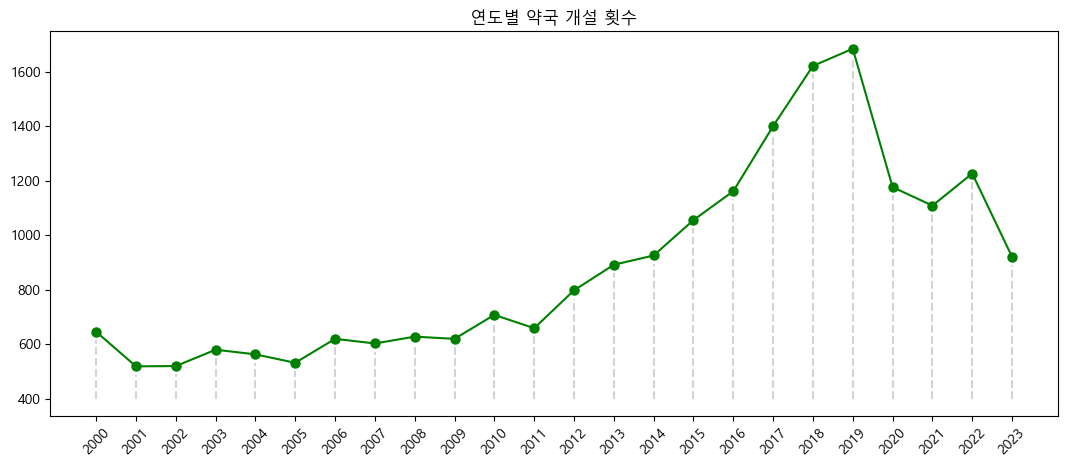

In [5]:
# 약국의 개설년도를 꺾은선그래프로 시각화 하여 보자.
whenYear = {} # 몇 년도가 나올지는 모르니, 딕셔너리를 활용하여보자.
for row in data:
    if row[5] and int(row[5][:4])>=2000: #개설 일자가 실제로 존재하면서, 2000년대 이후라면..
        if int(row[5][:4]) in whenYear: #만약 딕셔너리에 해당 년도를 key로 가진 value가 있다면..
            whenYear[int(row[5][:4])]+=1 #기존값에 1을 더해다다
        else:
            whenYear[int(row[5][:4])]=1 #없다면 그냥 새로 만들어주자.
print(whenYear[2023])            

plt.figure(figsize=(13,5)) #화면 크기 설정
plt.title("연도별 약국 개설 횟수") #제목 설정
whenYear=dict(sorted(whenYear.items())) #꺾은선 그래프를 활용하기 위해 sorted 함수를 이용해준다.
plt.xticks([i for i in range(2000, 2024, 1)], rotation=45) #X축 간격 설정 
plt.yticks([i for i in range(400, 2001, 200)]) #Y축 간격 설정
plt.plot(whenYear.keys(), whenYear.values(), color="green", marker='.', markersize=13) #기본 그래프 그리기
#for i in whenYear.keys(): 
#    height = whenYear[i]
#    plt.text(i, height + 10, '%d' %height, ha='center', va='bottom', size = 10) #실제 값을 그래프에 적어준다.
for i in whenYear.keys():
    plt.plot([i, i], [400, whenYear[i]-30], color="lightgray", linestyle='dashed') #가독성을 위해 점선도 그려주자
plt.show() 

##### 코로나 시점 이후로 유의미하게 개업하는지 먼저 확인해보자.

93


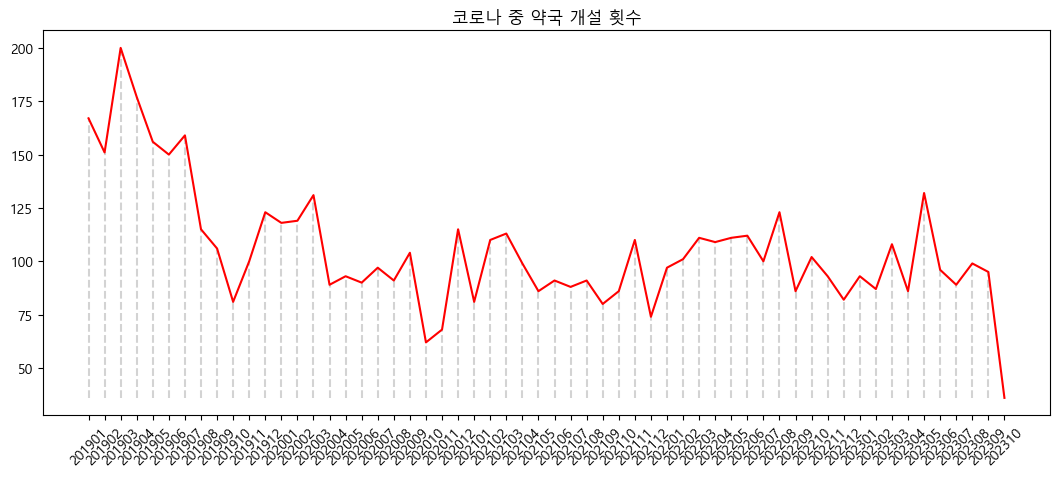

In [6]:

# 약국 개업 시점에 대한 꺾은선 그래프를 시각화하여 겹쳐보자.
t = {} # 이번엔 달까지 이용해보자. 딕셔너리를 활용하여보자.
for row in data:
    if row[5] and 2023>=int(row[5][:4])>=2019: #개설 일자가 실제로 존재하면서, 1990년대 이후라면..
        if row[5][:6] in t: #만약 딕셔너리에 해당 년도를 key로 가진 value가 있다면..
            t[row[5][:6]]+=1 #기존값에 1을 더해다다
        else:
            t[row[5][:6]]=1 #없다면 그냥 새로 만들어주자.
print(t["202301"]) 

plt.figure(figsize=(13,5)) #화면 크기 설정
plt.title("코로나 중 약국 개설 횟수") #제목 설정
t=dict(sorted(t.items())) #꺾은선 그래프를 활용하기 위해 sorted 함수를 이용해준다.
plt.xticks(rotation=45) #X축 간격 설정 
for i in t.keys():
    plt.plot([i, i], [min(t.values()), t[i]], color="lightgray", linestyle='dashed') #가독성을 위해 점선도 그려주자
plt.plot(t.keys(), t.values(), color='r')
plt.show() 

##### 코로나 확진자 수가 약국 개업 시점에 실제로 영향을 주는지 알아보자.

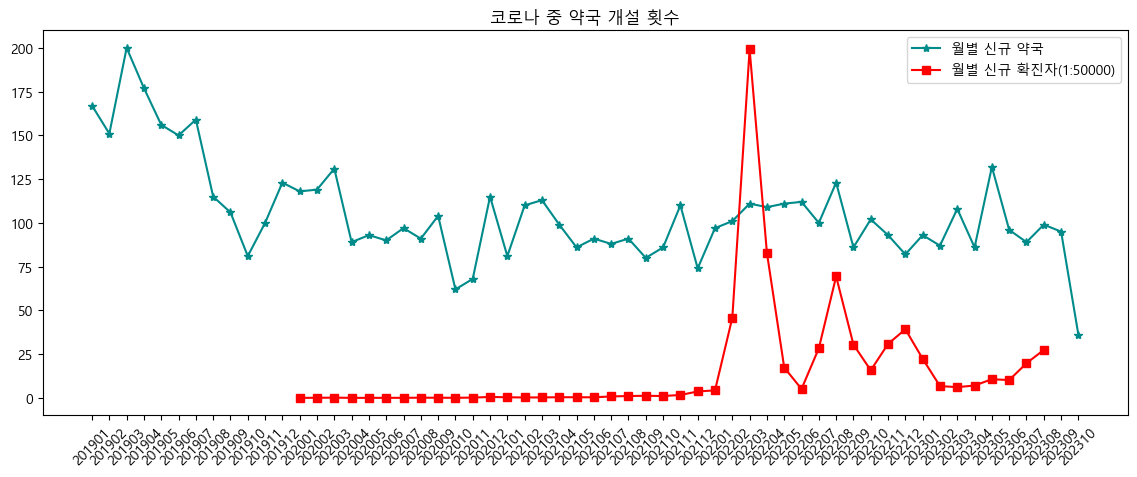

In [7]:
# 코로나 확진자 수에 대한 꺾은선 그래프와, 약국 개업 시점에 대한 꺾은선 그래프를 시각화하여 겹쳐보자.
tt = [] # 확진자 수에 대한 데이터는 정렬되어있으니, 리스트를 이용하여 담자.
pre = "" # 이 pre 변수를 활용하여 담을 것이다.
for row in datac[1:]: # 첫 줄은 누계다, 즉 지금까지의 확진자의 총합이다.
    if type(row[1]) == str:
        row[1]=int(row[1].replace(',','')) #쉼표가 들어가면 문자열로 인식되고, 아니라면 숫자로서 인식된다. 문자열일 경우에만 바꿔준다.
    if row[0][:7] != pre: #이전과 다르다는 뜻은, 월이 넘어갔다는 뜻이다. 넘어갈때에는 새로 생성해주고
        tt.append(row[1])
        pre=row[0][:7]
    else: # 아니면 기존 값에 추가해주자.
        tt[-1]+=row[1]

plt.figure(figsize=(14,5)) #화면 크기 설정
plt.title("코로나 중 약국 개설 횟수") #제목 설정
t=dict(sorted(t.items())) #꺾은선 그래프를 활용하기 위해 sorted 함수를 이용해준다.
plt.xticks(rotation=45) #X축 간격 설정 
plt.plot(t.keys(), t.values(), color="darkcyan", label="월별 신규 약국", marker='*')
ttx=[str(i*100+j) for i in range(2020, 2024) for j in (range(1, 13) if i<2023 else range(1, 9))]
tt=[i/50000 for i in tt] # 확진자 수가 너무 급진적이기때문에 범위를 줄여주자.
plt.plot(ttx, tt, color='r', label="월별 신규 확진자(1:50000)", marker='s')
plt.legend() #범례를 표시해준다.
plt.show() 

#### 결론: 코로나-19는 전국적으로, 또한 전반적으로 오히려 약국 개설에 악영향을 끼쳤다. 2011년도 이후 쭉 오르던 추세에서, 단숨에 꺾여버렸다. 한편, 코로나 자체는 악영향을 끼쳤으나, 유행세가 직접적으로 영향을 주진 않은 것으로 보인다.

### 이제 지역적으로 알아보자.

#### 먼저, 약국은 어떻게 분포되어 있을까?

{'서울': 2009.5258215962442, '인천': 2010.2767857142858, '경기': 2011.638560592697, '충남': 2009.857142857143, '충북': 2008.0802213001384, '부산': 2010.1466745843231, '대구': 2009.7262773722628, '세종시': 2015.3037974683543, '전북': 2007.9442755825735, '경북': 2007.7777777777778, '경남': 2009.7814088598402, '전남': 2007.9130434782608, '강원': 2007.3822284908322, '광주': 2010.0413793103448, '울산': 2009.7136363636364, '제주': 2010.2932098765432, '대전': 2009.8417639429313}


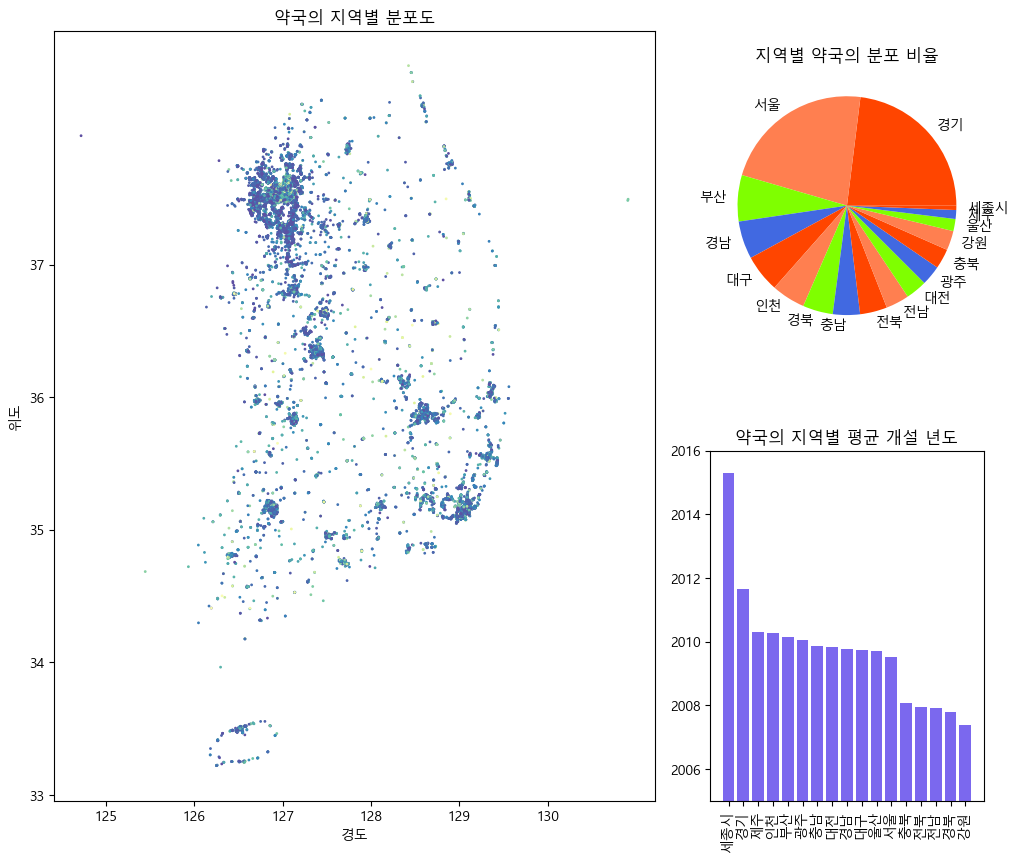

In [8]:
mapx=[]
mapy=[]
maps=[]
mapcolor=[] # 지도의 x좌표, y좌표, 점의 크기, 개설 일자에 따른 색 변화를 위해 리스트를 만들어준다. 
for row in data:
    if row[-2] and row[-1]: #위도와 경도가 모두 존재한다면
        mapx.append(float(row[-2]))
        mapy.append(float(row[-1])) #각각 추가해주고,
        maps.append(1) #점의 사이즈와 
        mapcolor.append(int(row[5][:4]) if row[5][:4] else 1900) #개설일자가 있을때엔 수로 지정해준다. (없다면 기본으로)
        
ttt={} # 지역별 약국 비율을 보기 위하여 각 지역별로 계수하기 위해 딕셔너리를 생성한다.
for row in data:
    if row[1] in ttt: #이하동문 
        ttt[row[1]]+=1
    else:
        ttt[row[1]]=1
        
tttt={} #평균 개설 년도를 알아보기 위해 만들어주자.
for row in data:
    if row[5][:4]: #개설년도가 존재한다면 
        if row[1] in tttt: #지역이 추가되었는지 확인하여 평균을 내기 위해 리스트에 어팬드해준다.
            tttt[row[1]].append(int(row[5][:4]))
        else:
            tttt[row[1]]=[int(row[5][:4])]
for i in tttt.keys(): #각 지역별로 평균값으로 대체해준다.
    sum=0
    for j in tttt[i]: #해당 지역의 약국의 개설년도를 돌면서 
        sum+=int(j) #먼저 전부 더하고
    tttt[i]=sum/len(tttt[i]) #최종적으로 나눠준다.
print(tttt)

from matplotlib.gridspec import GridSpec # 여러 그래프를 한 사진에 표현하기 위해 관련 클래스를 불러와준다. 
gs = GridSpec(2, 3)
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(gs[:, :2])
ax2 = fig.add_subplot(gs[0, 2]) 
ax3 = fig.add_subplot(gs[1, 2]) #각 그래프가 들어갈 공간을 할당해준다

ax1.set_title("약국의 지역별 분포도") #산점도 그래프를 그리기 위해 
ax1.set_xticks([i for i in range(round(float(min(mapx))), round(float(max(mapx))))]) #위도와 경도를 적절히
ax1.set_yticks([i for i in range(round(float(min(mapy))), round(float(max(mapy))))]) #설정해준다.
ax1.set_xlabel("경도")
ax1.set_ylabel("위도")
ax1.scatter(mapx, mapy, s=maps, c=mapcolor, cmap="Spectral") #점 크기와 컬러맵을 불러와준다.
#ax1.colorbar()

ax2.set_title("지역별 약국의 분포 비율")
ttt=dict(sorted(ttt.items(), key=lambda x: x[1], reverse=True)) #원그래프를 잘 보이게 하기 위해 정렬해준다.
tttcolor=["orangered", "coral", "chartreuse", "royalblue"]
ax2.pie(ttt.values(), labels=ttt.keys(), colors=tttcolor)

ax3.set_title("약국의 지역별 평균 개설 년도")
tttt=dict(sorted(tttt.items(), key=lambda x: x[1], reverse=True)) #역시 정렬해준다.
ax3.bar(tttt.keys(), tttt.values(), color="mediumslateblue", )
ax3.set_xticks([i for i in range(len(tttt.keys()))], labels=tttt.keys(), rotation=90) #너무 작아 90도 돌려준다.
ax3.set_ybound(2005, 2016) # 최댓값과 최소값을 지정해준다.

plt.show()


#### 코로나 기간동안 지역별로 어떻게 개설되었는지 확인하여보자.

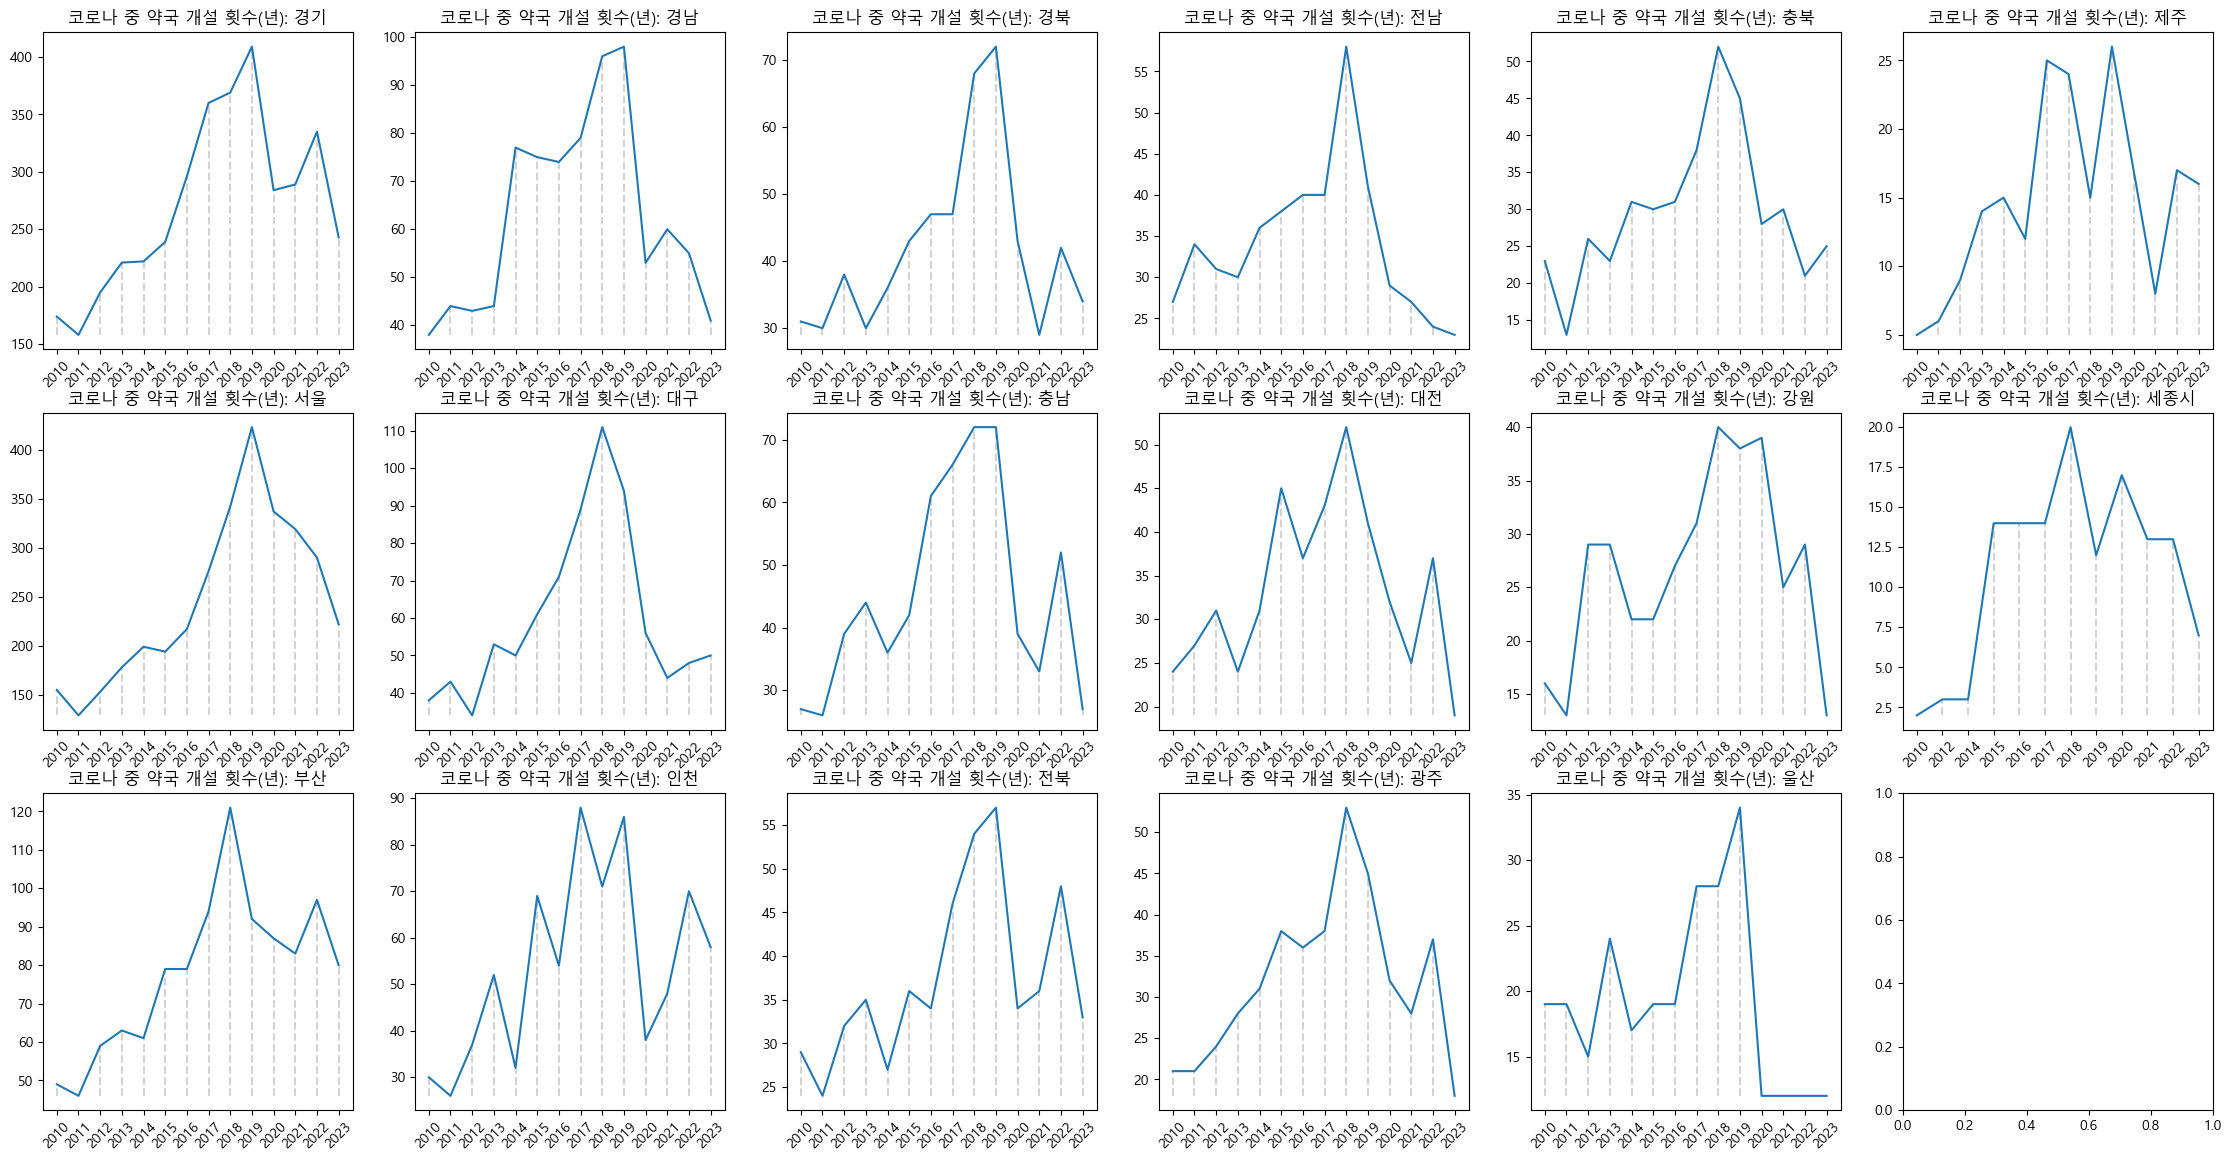

In [9]:
# 약국 개업 시점에 대한 꺾은선 그래프를 시각화하여 겹쳐보자.
gs = GridSpec(3, 6) #18칸짜리 공간을 할당해준다.
fig = plt.figure(figsize=(28, 14))
ax = [fig.add_subplot(gs[j, i]) for i in (range(6) if j!=3 else range(5)) for j in range(3)] #리스트컴프리헨션을 이용하여 칸을 할당해준다.
nind=0 #따로 인덱스를 선언해주었다. for문에서 할당된 공간에 그릴 때에 이용할 것이다.
for key in ttt.keys():
    t = {} # 이번엔 달까지 이용해보자. 딕셔너리를 활용하여보자.
    for row in data:
        if row[5] and 2023>=int(row[5][:4])>=2010 and row[1]==key: #개설 일자가 실제로 존재하면서, 2010년대 이후라면..
            if row[5][:4] in t: #만약 딕셔너리에 해당 년도를 key로 가진 value가 있다면..
                t[row[5][:4]]+=1 #기존값에 1을 더해준다
            else:
                t[row[5][:4]]=1 #없다면 그냥 새로 만들어주자.
    ax[nind].set_title(f"코로나 중 약국 개설 횟수(년): {key}") #제목 설정
    t=dict(sorted(t.items())) #꺾은선 그래프를 활용하기 위해 sorted 함수를 이용해준다.
    for i in t.keys():
        ax[nind].plot([i, i], [min(t.values()), t[i]], color="lightgray", linestyle='dashed') #가독성을 위해 점선도 그려주자
    ax[nind].plot(t.keys(), t.values())
    ax[nind].set_xticks(list(t.keys()), labels=t.keys(), rotation=45)
    nind+=1
plt.show() 

#### 결론: {이 부분은 니가 써줘 민재야}

### 총결론: {여기도.. 헤헤ㅔㅎ}